Advanced Machine Learning techniques on the Credit card fraud dataset
Dataset used: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("D:\codeclause\creditcard.csv")
# Import data based on the location you have downloaded it in

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().sum()

0

([<matplotlib.axis.XTick at 0x1a76e4259c0>,
 [Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')])

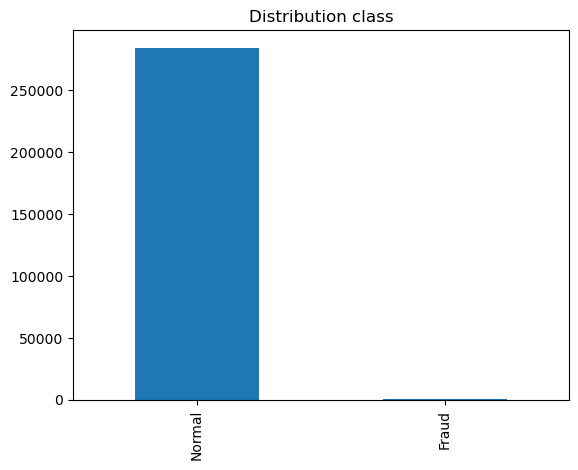

In [7]:
Labels=["Normal","Fraud"]
count=pd.value_counts(df['Class'],sort=True)
count.plot(kind='bar')
plt.title("Distribution class")
plt.xticks(range(2),Labels)

You can see that the data is unbalanced

Data preprocessing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scal=StandardScaler()
X=df.drop('Class',axis=1)
y=df['Class']

X_trainv,X_test,y_trainv,y_test=train_test_split(X,y,test_size=0.3,random_state=202)
X_train, X_validate, y_train, y_validate = train_test_split(X_trainv, y_trainv, 
                                                            test_size=0.2, random_state=42)

In [9]:
X_train=scal.fit_transform(X_train)
X_validate=scal.transform(X_validate)
X_test=scal.transform(X_test)

temp1=y_train.value_counts()[0]/len(y_train)
temp2=y_train.value_counts()[1]/len(y_train)
print(f"Fraud transaction weight:{temp2}")
print(f"Normal Transaction weight:{temp1}")

Fraud transaction weight:0.0016928854919713338
Normal Transaction weight:0.9983071145080287


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

# Function to find the model accuracy and effectiveness

def acc_score(y_fin,y_pred,train=True):
    if train:
        clfr=pd.DataFrame(classification_report(y_fin,y_pred, output_dict=True))
        print(f"Accuracy for train: {accuracy_score(y_fin,y_pred)*100:.2f}")
        print()
        print(f"Classification Report:{clfr}")
        print()
        print(f"Confusion Mat: \n {confusion_matrix(y_train,y_pred)}")
    elif train==False:
        clfr=pd.DataFrame(classification_report(y_fin,y_pred,output_dict=True))
        print("Result for test data")
        print(f"Accuracy for test: {accuracy_score(y_fin,y_pred)*100:.2f}")
        print()
        print(f"Classification Report:{clfr}")
        print()
        print(f"Confusion Mat: \n {confusion_matrix(y_fin,y_pred)}")


In this notebook we are using various Neural networks and comparing how they are working on the particular dataset

In [11]:
# Model 1: Neural Networks
from tensorflow import keras

In [12]:
model1=keras.Sequential([keras.layers.Dense(256,activation='relu',input_shape=(X_train.shape[-1],)),
                         keras.layers.BatchNormalization(),
                         keras.layers.Dropout(0.3),
                         keras.layers.Dense(256,activation='relu'),
                         keras.layers.BatchNormalization(),
                         keras.layers.Dropout(0.3),
                         keras.layers.Dense(256,activation="relu"),
                         keras.layers.BatchNormalization(),
                         keras.layers.Dropout(0.3),
                         keras.layers.Dense(1,activation='sigmoid')   
                        
                         ])


In [13]:
# To check the accuracy 
opti=[
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='p'),
    keras.metrics.Recall(name='R')
]

In [14]:
model1.compile(optimizer=keras.optimizers.Adam(1e-4),loss='binary_crossentropy',metrics=opti)
cbacks= [keras.callbacks.ModelCheckpoint("model1_epoch_{epoch}.h5")]
cweight={0:temp1, 1:temp2}

fin=model1.fit(X_train,y_train,validation_data=(X_validate,y_validate),batch_size=2048,epochs=100,
               callbacks=cbacks)


Epoch 1/100
78/78 [==============================] - 9s 64ms/step - loss: 0.7974 - fn: 65.0000 - fp: 72879.0000 - tn: 86342.0000 - tp: 205.0000 - p: 0.0028 - R: 0.7593 - val_loss: 0.5553 - val_fn: 9.0000 - val_fp: 151.0000 - val_tn: 39664.0000 - val_tp: 49.0000 - val_p: 0.2450 - val_R: 0.8448
Epoch 2/100
78/78 [==============================] - 5s 61ms/step - loss: 0.6865 - fn: 39.0000 - fp: 60930.0000 - tn: 98291.0000 - tp: 231.0000 - p: 0.0038 - R: 0.8556 - val_loss: 0.4828 - val_fn: 9.0000 - val_fp: 72.0000 - val_tn: 39743.0000 - val_tp: 49.0000 - val_p: 0.4050 - val_R: 0.8448
Epoch 3/100
78/78 [==============================] - 4s 54ms/step - loss: 0.6132 - fn: 42.0000 - fp: 48434.0000 - tn: 110787.0000 - tp: 228.0000 - p: 0.0047 - R: 0.8444 - val_loss: 0.4414 - val_fn: 9.0000 - val_fp: 45.0000 - val_tn: 39770.0000 - val_tp: 49.0000 - val_p: 0.5213 - val_R: 0.8448
Epoch 4/100
78/78 [==============================] - 4s 49ms/step - loss: 0.5476 - fn: 34.0000 - fp: 36736.0000 - tn: 1

In [15]:
score=model1.evaluate(X_test,y_test)
score

2671/2671 [==============================] - 7s 3ms/step - loss: 0.0053 - fn: 46.0000 - fp: 17.0000 - tn: 85262.0000 - tp: 118.0000 - p: 0.8741 - R: 0.7195


[0.005279316566884518,
 46.0,
 17.0,
 85262.0,
 118.0,
 0.8740741014480591,
 0.7195122241973877]

In [16]:
y_trainpred=model1.predict(X_train)
y_testpred=model1.predict(X_test)

acc_score(y_train,y_trainpred.round(),train=True)
acc_score(y_test,y_testpred.round(),train=False)
dictscore={
    'ANNs':{
        "Train":f1_score(y_train,y_trainpred.round()),
        "Test": f1_score(y_test,y_testpred.round())
    }
}

2671/2671 [==============================] - 6s 2ms/step
Accuracy for train: 99.95

Classification Report:                       0           1  accuracy      macro avg   weighted avg
precision       0.999617    0.945701  0.999542       0.972659       0.999526
recall          0.999925    0.774074  0.999542       0.886999       0.999542
f1-score        0.999771    0.851324  0.999542       0.925547       0.999519
support    159221.000000  270.000000  0.999542  159491.000000  159491.000000

Confusion Mat: 
 [[159209     12]
 [    61    209]]
Result for test data
Accuracy for test: 99.93

Classification Report:                      0           1  accuracy     macro avg  weighted avg
precision      0.999461    0.874074  0.999263      0.936767      0.999220
recall         0.999801    0.719512  0.999263      0.859656      0.999263
f1-score       0.999631    0.789298  0.999263      0.894464      0.999227
support    85279.000000  164.000000  0.999263  85443.000000  85443.000000

Confusion Mat: 


RandomForest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=110,oob_score=False)
rfc.fit(X_train,y_train)
y_trainpred=rfc.predict(X_train)
y_testpred=rfc.predict(X_test)

acc_score(y_train,y_trainpred,train=True)
acc_score(y_test,y_testpred,train=False)
dictscore['Randomforest']={
    "Train":f1_score(y_train,y_trainpred),
    "Test":f1_score(y_test,y_testpred)
}

Accuracy for train: 100.00

Classification Report:                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996296  0.999994       0.998148       0.999994
f1-score        0.999997    0.998145  0.999994       0.999071       0.999994
support    159221.000000  270.000000  0.999994  159491.000000  159491.000000

Confusion Mat: 
 [[159221      0]
 [     1    269]]
Result for test data
Accuracy for test: 99.94

Classification Report:                      0          1  accuracy     macro avg  weighted avg
precision      0.999566    0.92029  0.999438      0.959928      0.999414
recall         0.999871    0.77439  0.999438      0.887131      0.999438
f1-score       0.999719    0.84106  0.999438      0.920389      0.999414
support    85279.000000  164.00000  0.999438  85443.000000  85443.000000

Confusion Mat: 
 [[85268    11]
 [   37   127]]


XGBoost

In [18]:
# DepthWise tree

In [19]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train,eval_metric='aucpr')
y_trainpred=xgb.predict(X_train)
y_testpred=xgb.predict(X_test)

acc_score(y_train,y_trainpred,train=True)
acc_score(y_test,y_testpred,train=False)
dictscore['XGB']={
    "Train":f1_score(y_train,y_trainpred),
    "Test":f1_score(y_test,y_testpred)
}

c:\Users\yores\AppData\Local\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


Accuracy for train: 100.00

Classification Report:                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159221.0  270.0       1.0   159491.0      159491.0

Confusion Mat: 
 [[159221      0]
 [     0    270]]
Result for test data
Accuracy for test: 99.95

Classification Report:                      0           1  accuracy     macro avg  weighted avg
precision      0.999566    0.947761  0.999485      0.973664      0.999467
recall         0.999918    0.774390  0.999485      0.887154      0.999485
f1-score       0.999742    0.852349  0.999485      0.926046      0.999459
support    85279.000000  164.000000  0.999485  85443.000000  85443.000000

Confusion Mat: 
 [[85272     7]
 [   37   127]]


CatBoost


In [20]:
# Symmetric Tree 

In [21]:
from catboost import CatBoostClassifier

cbc=CatBoostClassifier()
cbc.fit(X_train,y_train)

Learning rate set to 0.089847
0:	learn: 0.3887254	total: 201ms	remaining: 3m 21s
1:	learn: 0.2343837	total: 245ms	remaining: 2m 2s
2:	learn: 0.1343697	total: 287ms	remaining: 1m 35s
3:	learn: 0.0784671	total: 325ms	remaining: 1m 20s
4:	learn: 0.0477819	total: 365ms	remaining: 1m 12s
5:	learn: 0.0306784	total: 403ms	remaining: 1m 6s
6:	learn: 0.0206532	total: 443ms	remaining: 1m 2s
7:	learn: 0.0147317	total: 480ms	remaining: 59.5s
8:	learn: 0.0109480	total: 517ms	remaining: 56.9s
9:	learn: 0.0085323	total: 552ms	remaining: 54.7s
10:	learn: 0.0069154	total: 589ms	remaining: 52.9s
11:	learn: 0.0058227	total: 624ms	remaining: 51.3s
12:	learn: 0.0050066	total: 662ms	remaining: 50.2s
13:	learn: 0.0044171	total: 697ms	remaining: 49.1s
14:	learn: 0.0039794	total: 734ms	remaining: 48.2s
15:	learn: 0.0036600	total: 769ms	remaining: 47.3s
16:	learn: 0.0034172	total: 806ms	remaining: 46.6s
17:	learn: 0.0032331	total: 843ms	remaining: 46s
18:	learn: 0.0030724	total: 881ms	remaining: 45.5s
19:	learn

In [22]:
y_trainpred=cbc.predict(X_train)
y_testpred=cbc.predict(X_test)
acc_score(y_train,y_trainpred,train=True)
acc_score(y_test,y_testpred,train=False)


Accuracy for train: 100.00

Classification Report:                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159221.0  270.0       1.0   159491.0      159491.0

Confusion Mat: 
 [[159221      0]
 [     0    270]]
Result for test data
Accuracy for test: 99.95

Classification Report:                      0           1  accuracy     macro avg  weighted avg
precision      0.999566    0.954887  0.999497      0.977227      0.999481
recall         0.999930    0.774390  0.999497      0.887160      0.999497
f1-score       0.999748    0.855219  0.999497      0.927483      0.999471
support    85279.000000  164.000000  0.999497  85443.000000  85443.000000

Confusion Mat: 
 [[85273     6]
 [   37   127]]


In [23]:
dictscore['Catb']={
    'Train':f1_score(y_train,y_trainpred),
    'Test':f1_score(y_test,y_testpred)
}

LightGbm

In [25]:
from lightgbm import LGBMClassifier

In [26]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
y_trainpred=lgbm.predict(X_train)
y_testpred=lgbm.predict(X_test)

acc_score(y_train,y_trainpred,train=True)
acc_score(y_test,y_testpred,train=False)


[LightGBM] [Info] Number of positive: 270, number of negative: 159221
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001693 -> initscore=-6.379626
[LightGBM] [Info] Start training from score -6.379626
Accuracy for train: 99.75

Classification Report:                       0           1  accuracy      macro avg   weighted avg
precision       0.999377    0.360759  0.997479       0.680068       0.998296
recall          0.998097    0.633333  0.997479       0.815715       0.997479
f1-score        0.998737    0.459677  0.997479       0.729207       0.997824
support    159221.000000  270.000000  0.997479  159491.000000  159491.000000

Confusion Mat: 
 [[158918    303]
 [    99    171]]
Result for test dat

In [27]:
dictscore['LGBM']={
    'Train':f1_score(y_train,y_trainpred),
    'Test':f1_score(y_test,y_testpred)
}

In [29]:
# Now we have prepared all the different kinds of models and will be comparing them
# The model comparison will be done on the basis of the 

In [31]:
comparedf=pd.DataFrame(dictscore)
comparedf

,ANNs,Randomforest,XGB,Catb,LGBM
Train,0.851324,0.998145,1.000000,1.000000,0.459677
Test,0.789298,0.841060,0.852349,0.855219,0.292135


<Axes: >

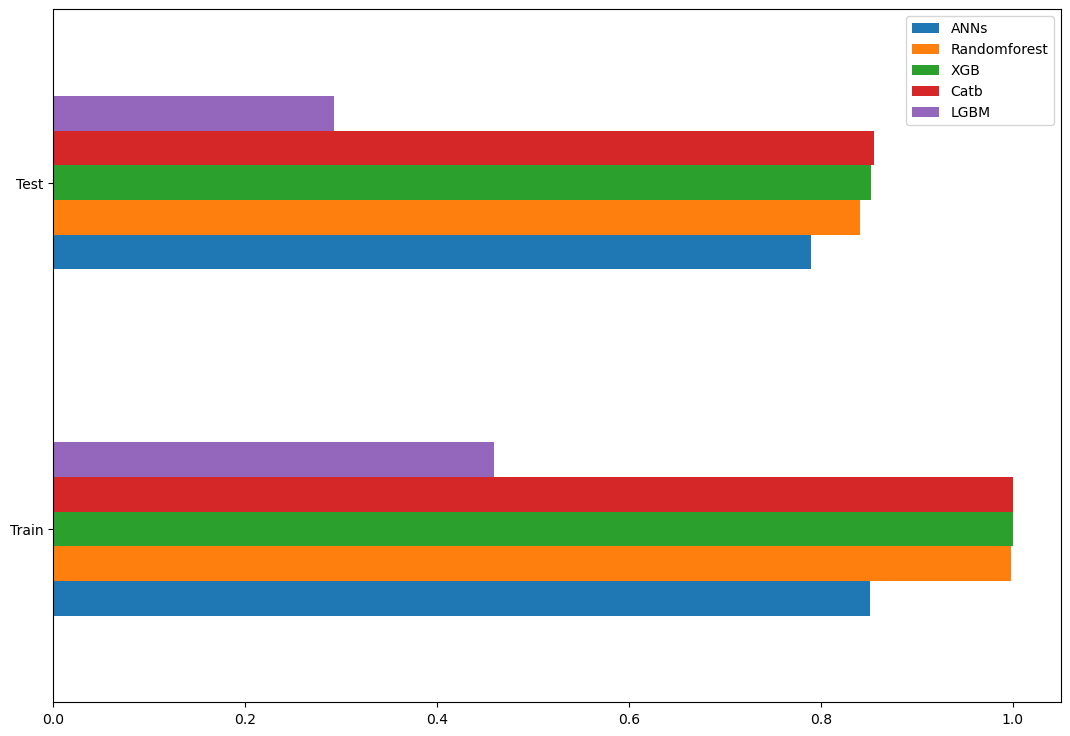

In [32]:
comparedf.plot(kind='barh',figsize=(13,9))

In [33]:
# Seeing this we can see that CatBoost prooves to be a better model choice as compared to others